In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
# Einteilung der Modelle nach Tumor Type 

file_path = '/sybig/home/tmu/Schreibtisch/PDX/PDX_Gao_2015.xlsx'
tissues_df = pd.read_excel(file_path, sheet_name='PCT raw data')
tissues_df = tissues_df[['Model', 'Tumor Type']]
tissues_df = tissues_df.drop_duplicates()
tissues_df = tissues_df.set_index('Model')


In [13]:
tissues_df

,Tumor Type
Model,
X-007,GC
X-007,GC
X-007,GC
X-007,GC
X-007,GC
...,...
X-6047,BRCA
X-6047,BRCA
X-6047,BRCA


In [16]:
# Finde alle Modelle, die mehrfach in tissues_df vorkommen
duplicates = tissues_df.reset_index()['Model'].value_counts()
multi_tumor_models = duplicates[duplicates > 1].index.tolist()

print("Modelle mit mehreren Tumor Types:", multi_tumor_models)

Modelle mit mehreren Tumor Types: ['X-3782', 'X-1468']


In [17]:
# Zeige alle Tumor Types pro Modell für die betroffenen Modelle
result = tissues_df.loc[['X-3782', 'X-1468']]['Tumor Type'].groupby(level=0).apply(list)
print(result)

Model
X-1468    [nan, BRCA]
X-3782    [nan, PDAC]
Name: Tumor Type, dtype: object


In [ ]:
# Cancer Types in PDX-Modelle
file_path = '/sybig/home/tmu/TUGDA/data/PDX_MTL_DA.csv'
fpkm_df = pd.read_csv(file_path, index_col=0)
fpkm_df = fpkm_df.merge(tissues_df, left_index=True, right_index=True, how='left')
fpkm_df = fpkm_df.fillna('NA')


In [10]:
len(fpkm_df)

399

In [5]:
# Predictions AUC (TUGDA)
file_path = '/sybig/home/tmu/Schreibtisch/Results/preds_AUC.csv'
df_preds_pdx = pd.read_csv(file_path)
df_preds_pdx = df_preds_pdx.set_index('index')
df_preds_pdx = df_preds_pdx.merge(tissues_df, left_index=True, right_index=True, how='left')
df_preds_pdx = df_preds_pdx.fillna('NA')

In [6]:
len(df_preds_pdx)

401

In [10]:
# Splite the dataframe, one for each Tumor Type 

tumor_types = ['NA', 'CRC', 'BRCA', 'PDAC', 'CM', 'NSCLC']
tumor_dfs_fpkm = {}
for t_type in tumor_types:
    filtered_df = fpkm_df[fpkm_df['Tumor Type'] == t_type].drop(columns=['Tumor Type'])
    tumor_dfs_fpkm[t_type] = filtered_df


In [11]:
tumor_dfs_fpkm

{'NA':             AATK     ABCA1      ABL1      ABL2     ACTR2     ACVR1    ACVR1B  \
 X-1095 -0.133912 -0.070977 -0.069624 -0.773627 -0.520218 -0.540477  1.525204   
 X-1169 -0.929242 -0.070977 -1.430195 -0.323399  0.529038  0.101482  0.471413   
 X-1318 -0.929242 -0.070977 -1.228718  0.010831  0.250862  0.839999  0.887164   
 X-1337  1.628574 -0.070977 -0.163906 -0.773627  0.355492 -0.037175  0.151189   
 X-1367 -0.929242 -0.070977 -0.889024  0.497606  0.406269 -0.540477  0.471413   
 ...          ...       ...       ...       ...       ...       ...       ...   
 X-5739 -0.929242 -0.070977  0.260054 -0.773627  0.303703  0.660411  0.265796   
 X-5808  0.217365 -0.070977 -0.485630  1.459967 -0.745087  1.077379 -0.423945   
 X-5959  1.116086 -0.070977 -0.485630  2.344632 -0.556372 -0.037175 -0.423945   
 X-5974 -0.929242 -0.070977 -0.889024 -0.323399  0.329726 -0.749219 -0.108638   
 X-6030  1.243587 -0.070977 -1.430195 -0.773627  1.009433  0.660411  1.823041   
 
           ACVR1C   

In [15]:
for t_type, df in tumor_dfs_fpkm.items():
    print(f"Tumor Type: {t_type}")
    print("Spalten:")
    print(df.shape)
    print("\n")  # Eine Leerzeile zwischen den Ausgaben

Tumor Type: NA
Spalten:
(210, 1792)


Tumor Type: CRC
Spalten:
(51, 1792)


Tumor Type: BRCA
Spalten:
(42, 1792)


Tumor Type: PDAC
Spalten:
(39, 1792)


Tumor Type: CM
Spalten:
(32, 1792)


Tumor Type: NSCLC
Spalten:
(27, 1792)




In [36]:
import os 

os.makedirs('./data/Tumor_Type_PDX', exist_ok=True)

for t_type, df in tumor_dfs_fpkm.items():
    # Save fpkm values
    df_fpkm = df
    file_first = f'./data/Tumor_Type_PDX/tumor_type_fpkm_response_{t_type}.csv'
    # Speichern
    df_fpkm.to_csv(file_first)

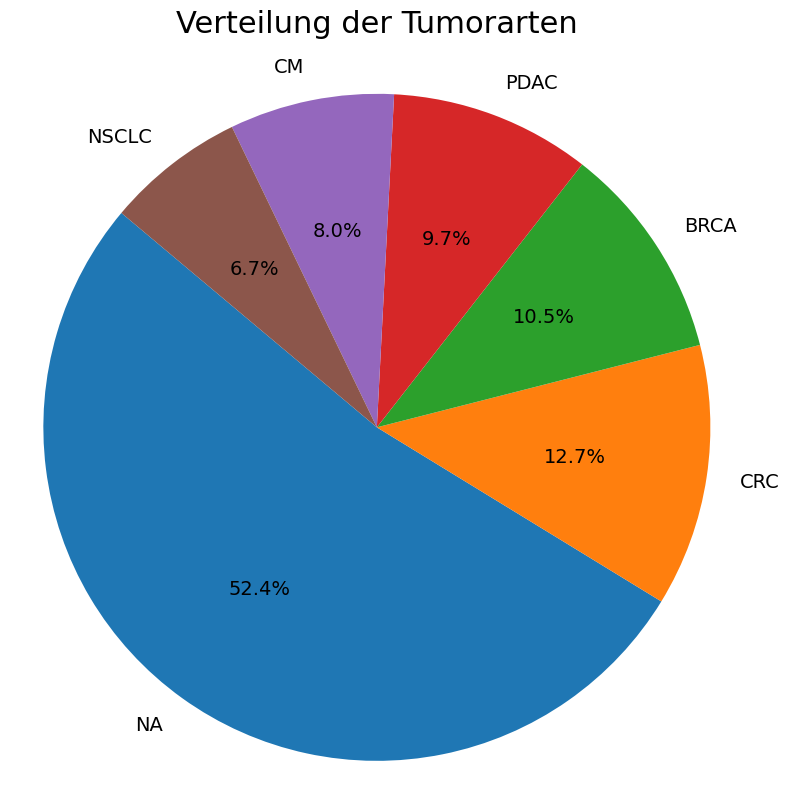

In [62]:
# Kreisdiagramm
tumor_counts = fpkm_df['Tumor Type'].value_counts()

plt.figure(figsize=(8, 8)) 
patches, texts, autotexts = plt.pie(tumor_counts, labels=tumor_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})

for text in texts:
    text.set_color('black')

for autotext in autotexts:
    autotext.set_color('black') 

plt.title('Verteilung der Tumorarten', color = 'black', fontsize=22, pad=30)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [37]:
# cell-line dataset;
gdsc_dataset = pd.read_csv('./data/GDSCDA_fpkm_AUC_all_drugs.zip', index_col=0)
# gene set range (first 1780 columns represent genes, from the 1781st column to the end represent data on drugs)
gene_list = gdsc_dataset.columns[0:1780]
drug_list = gdsc_dataset.columns[1780:]

# pdx novartis dataset (divided into cancer type):
pdx_dataset_brca = pd.read_csv('./data/Tumor_Type_PDX/tumor_type_fpkm_response_BRCA.csv', index_col=0)
pdx_dataset_cm = pd.read_csv('./data/Tumor_Type_PDX/tumor_type_fpkm_response_CM.csv', index_col=0)
pdx_dataset_crc = pd.read_csv('./data/Tumor_Type_PDX/tumor_type_fpkm_response_CRC.csv', index_col=0)
pdx_dataset_nsclc = pd.read_csv('./data/Tumor_Type_PDX/tumor_type_fpkm_response_NSCLC.csv', index_col=0)
pdx_dataset_pdac = pd.read_csv('./data/Tumor_Type_PDX/tumor_type_fpkm_response_PDAC.csv', index_col=0)
drugs_pdx_brca = pdx_dataset_brca.columns[1780:]

# pdx novartis dataset;
pdx_dataset = pd.read_csv('./data/PDX_MTL_DA.csv', index_col=0)
drugs_pdx = pdx_dataset.columns[1780:]


In [38]:
# genes and drug are extracted from the gdsc_dataset
gene_list = gdsc_dataset.columns[0:1780]
drug_list = gdsc_dataset.columns[1780:]

# Input data (X_train) and the target values (y_train)
# X_train contains the genes (features), y_train contains the drug effects (target values)
X_train = gdsc_dataset[gene_list].values
y_train = gdsc_dataset[drug_list].values

# Test data also extracted from another dataset (pdx_dataset)
X_test = pdx_dataset_brca[gene_list].values
y_test = pdx_dataset_brca[drugs_pdx_brca].values

X_train_unl = pdx_dataset_brca[gene_list].values